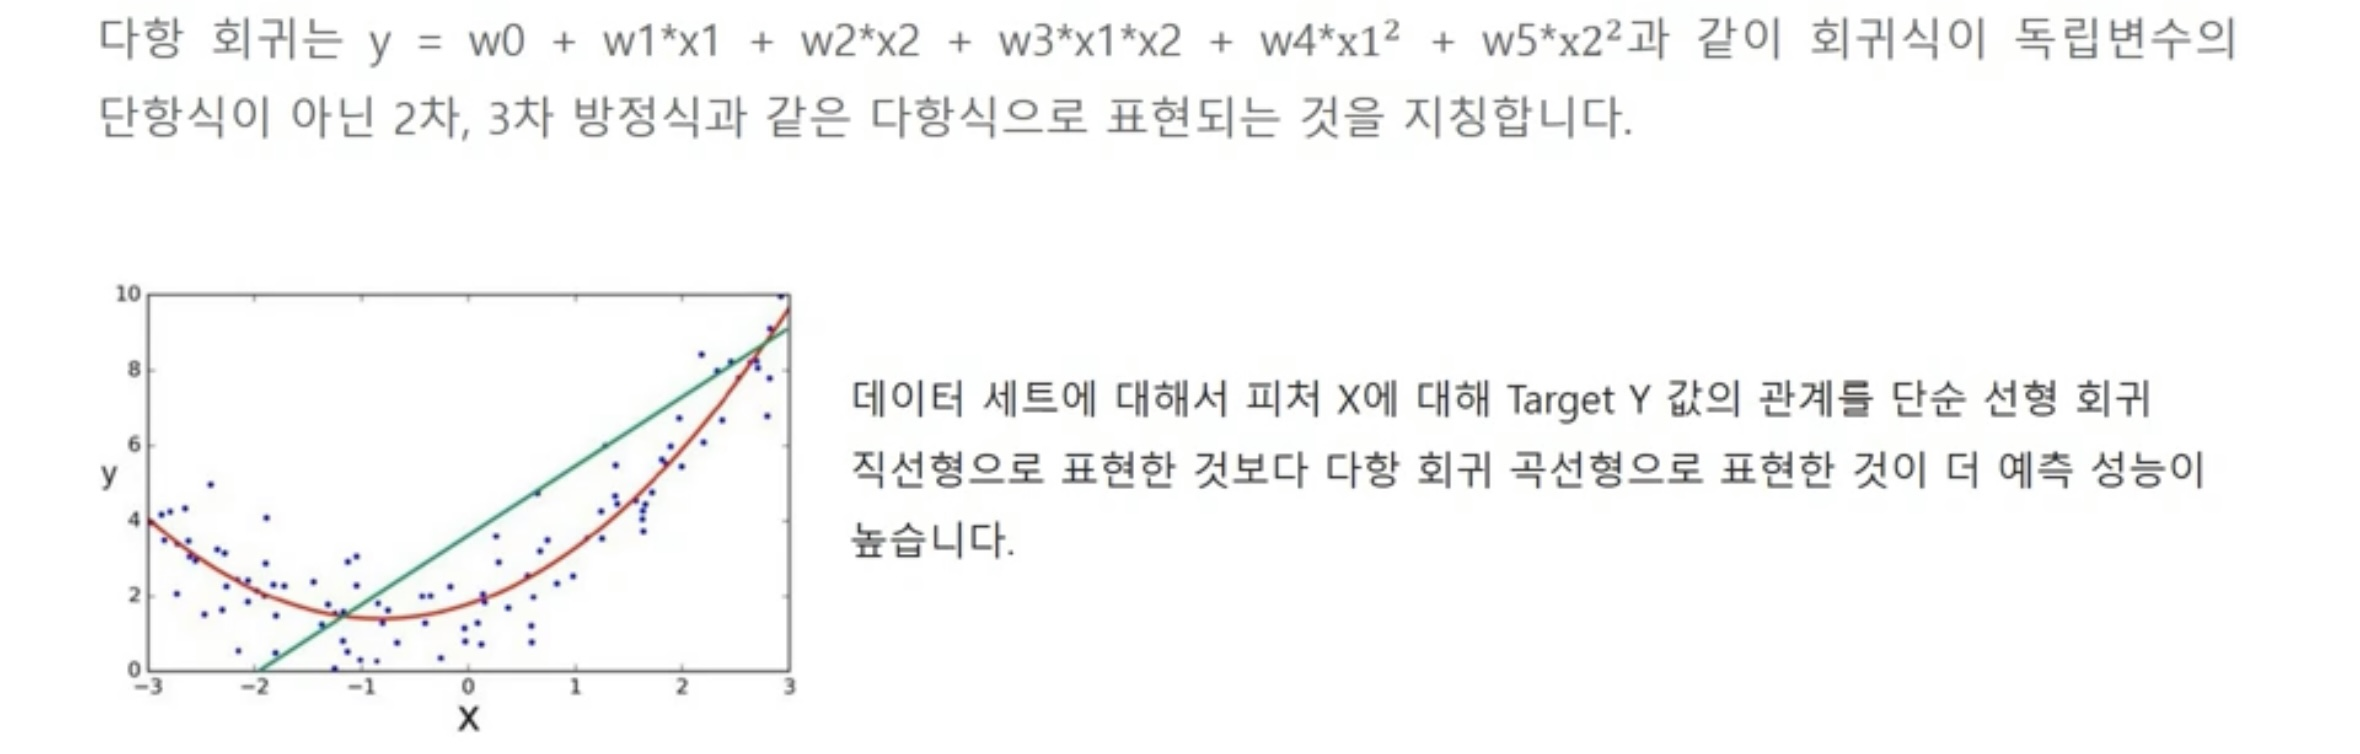

## 선형회귀와 비선형회귀의 구분
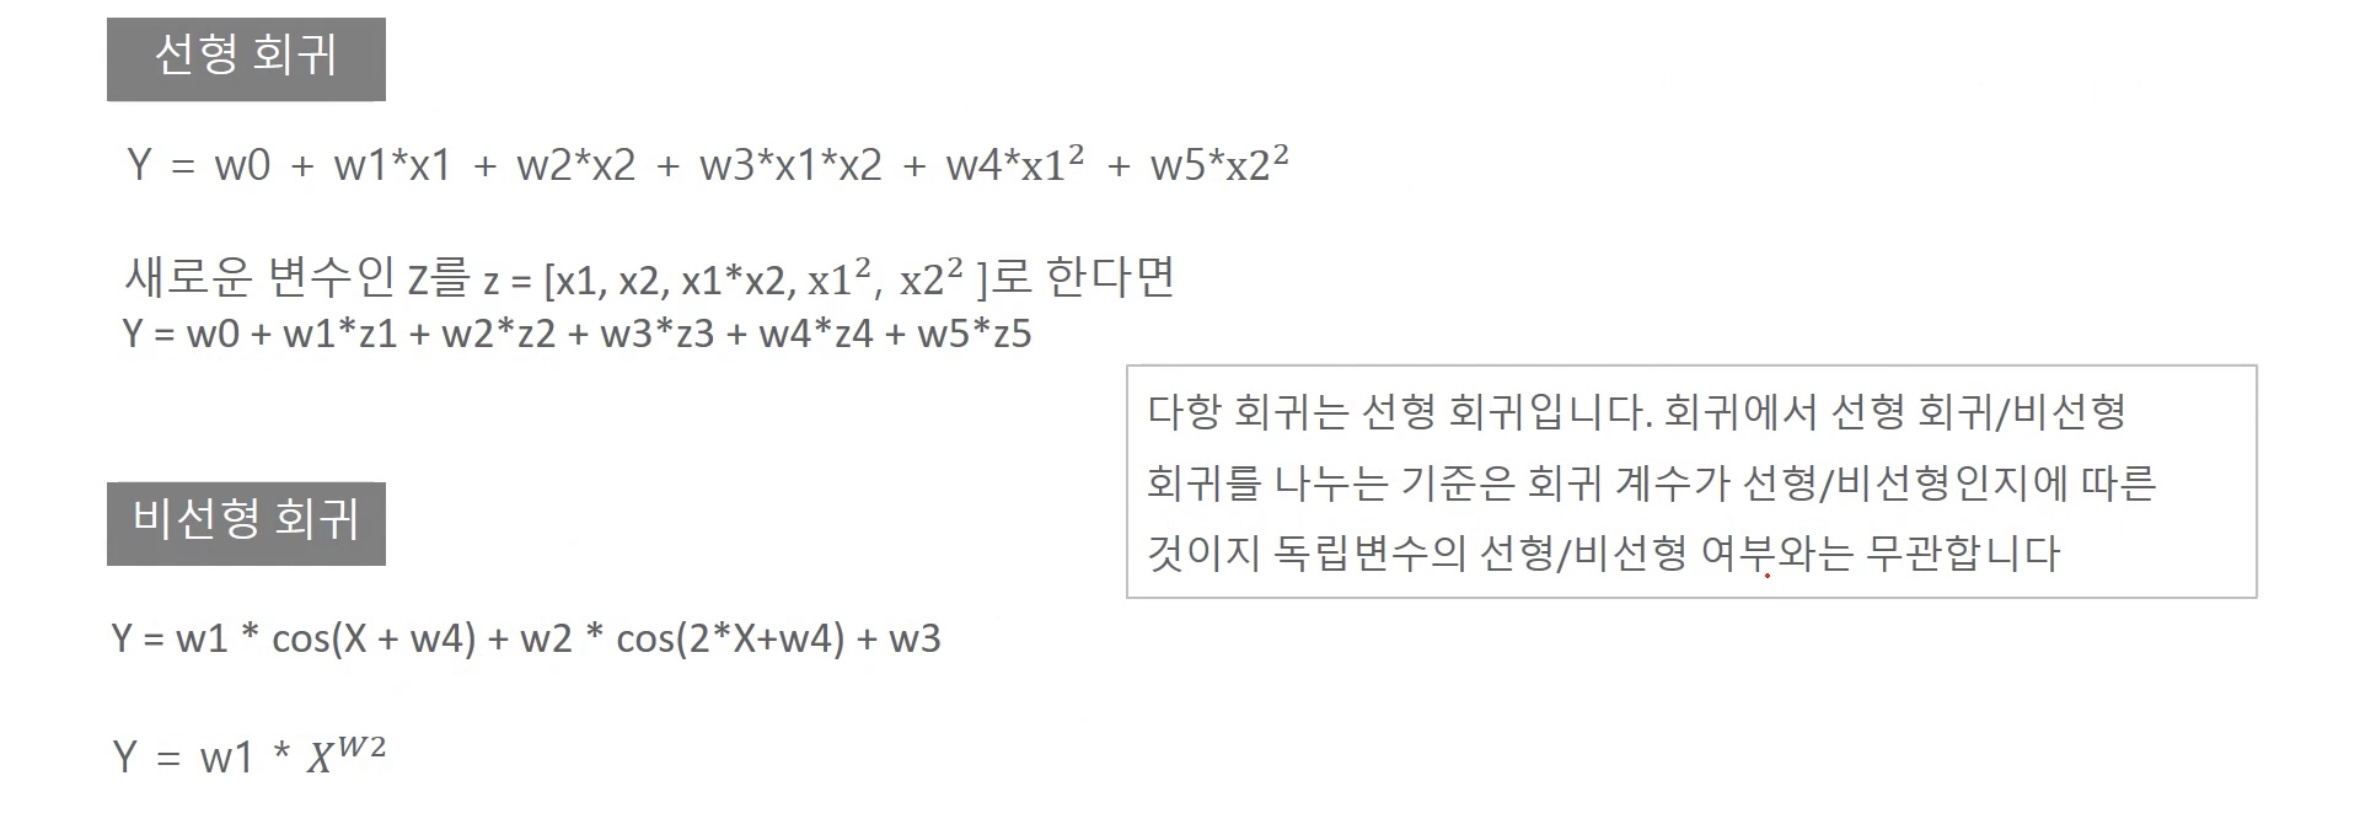

## 사이킷런에서의 다항 회귀
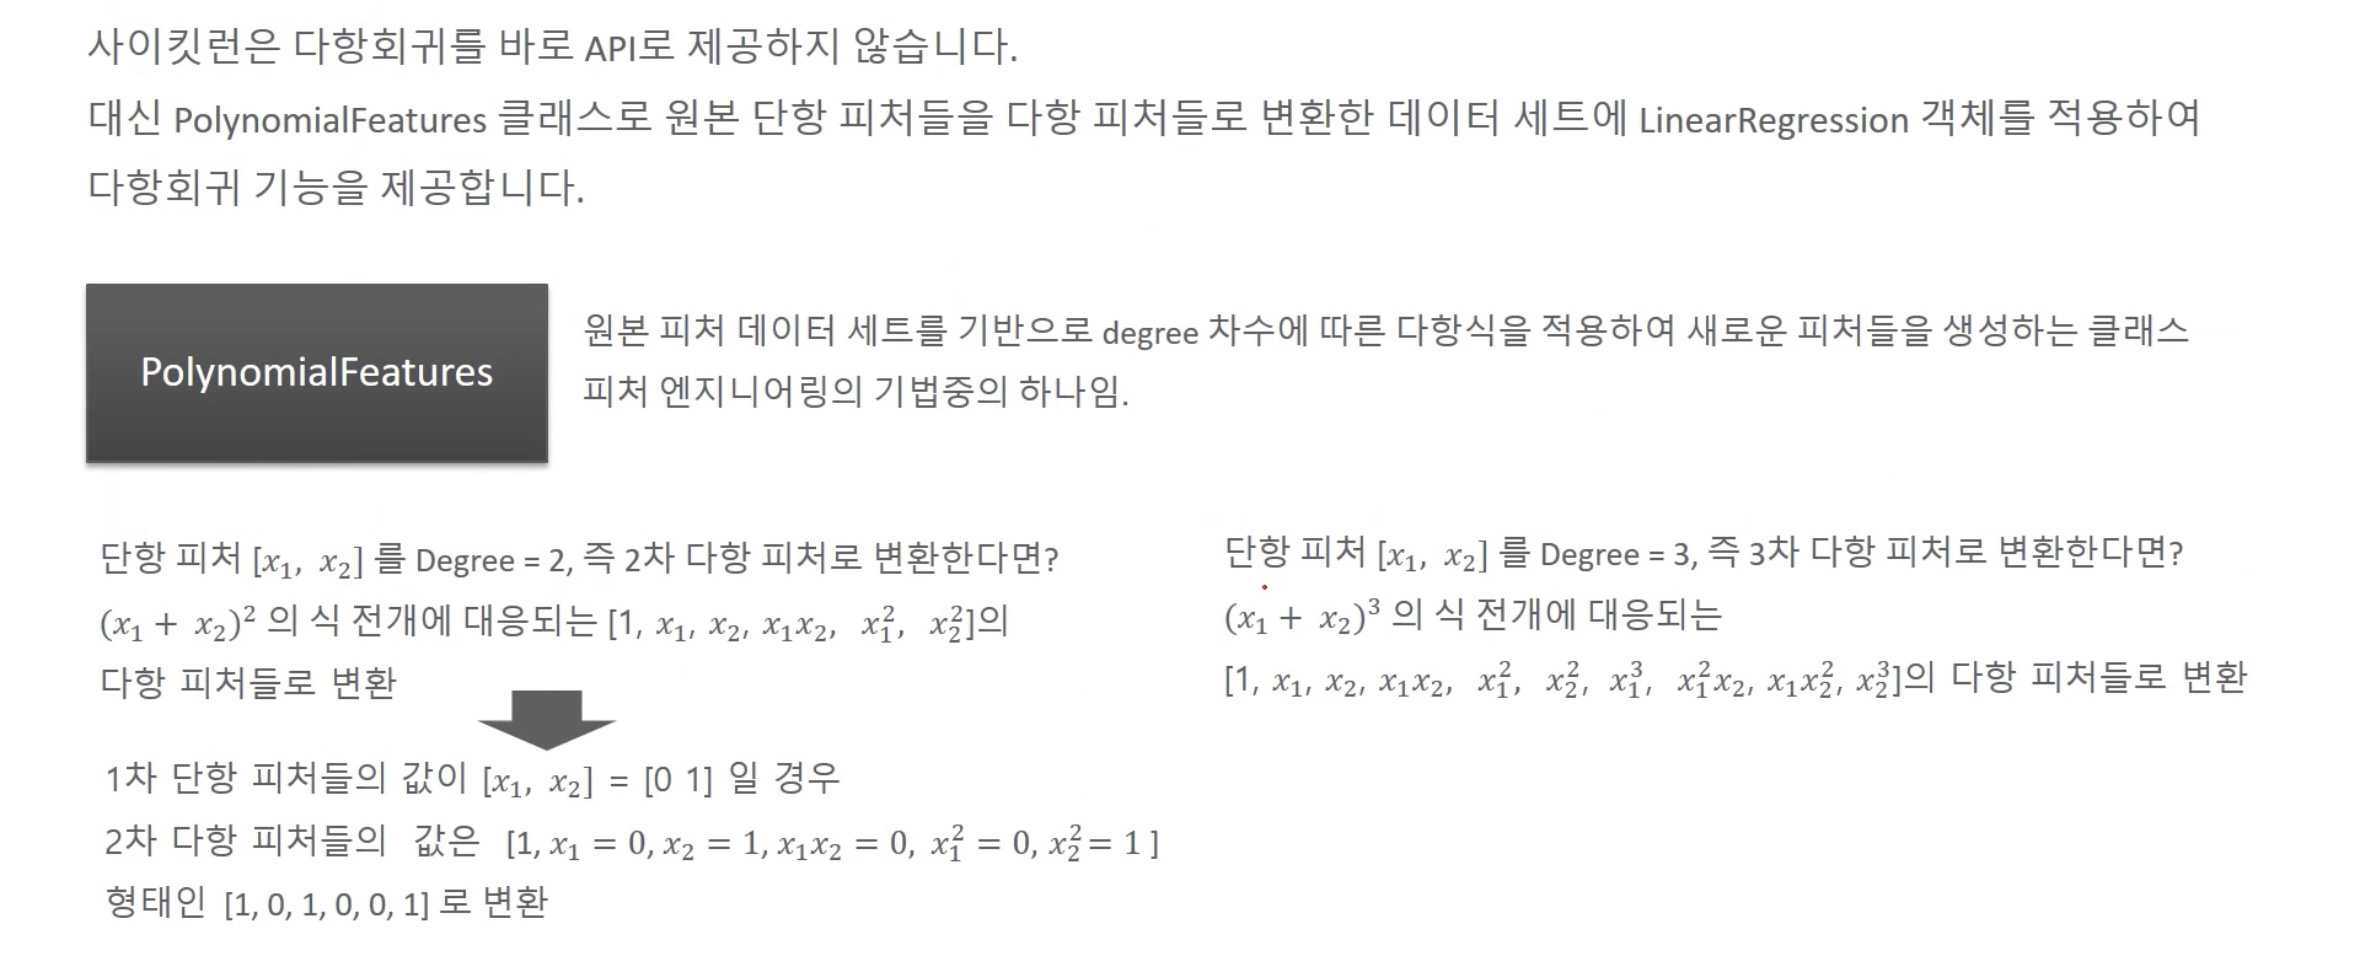

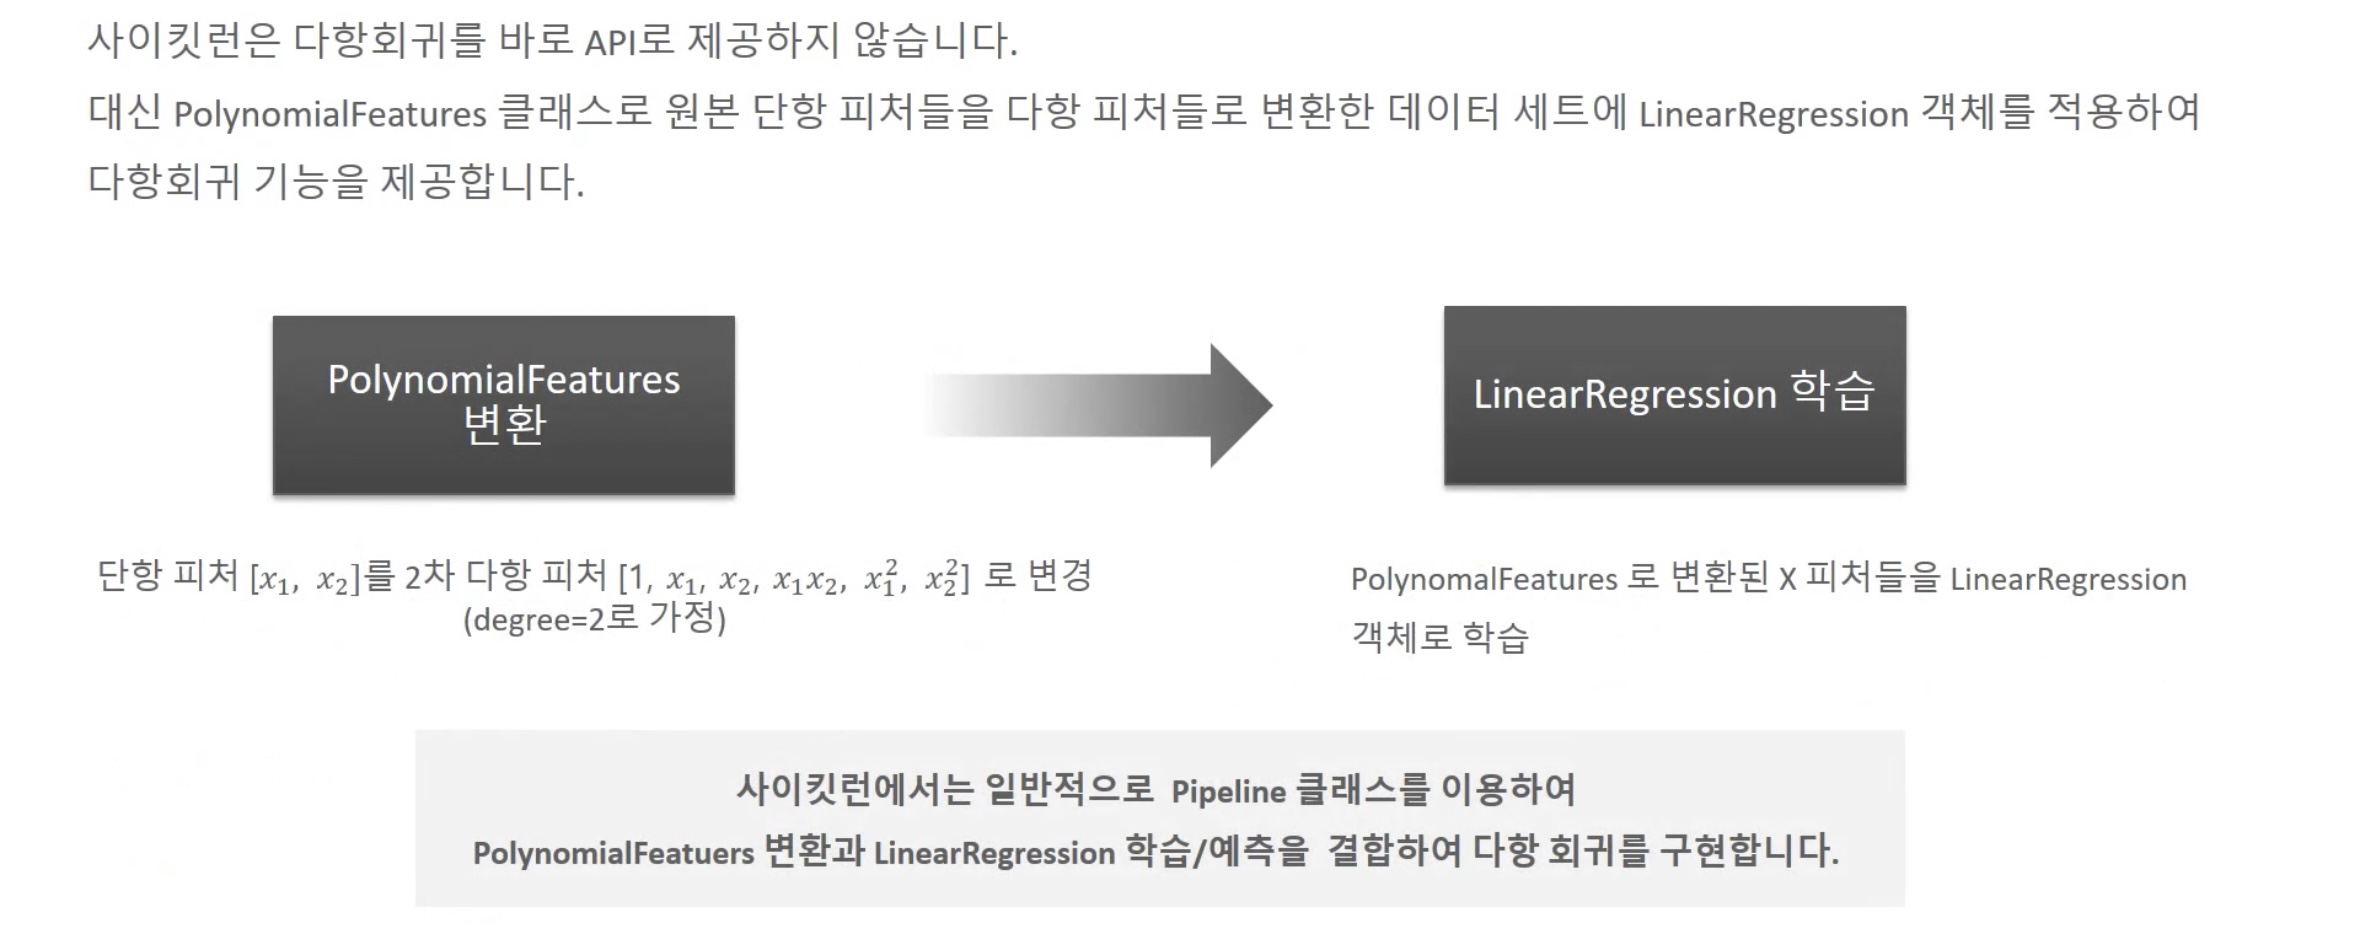

1차 단항 피처들의 값이 [x1,x2]=[0,1]  
2차 다항 피처들의 값은 [1, x1=0, x2=1, x1x2=0, x1^2=0, x2^2=1]  
[1,0,1,0,0,1]로 변환 

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

# 다항식으로 변환한 다항식 생성. [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X)생성. 즉,회귀식은 결정값 y=1+2x_1+3x_1^2+4x_2^3

In [3]:
from sklearn.linear_model import LinearRegression 

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y 

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]
3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습
사이킷런의 Pipeline 객체는 feature엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해준다.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline 
import numpy as np 

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y 

# Pipleline객체로 Streamline하게 Polynomial Feature변환과 LinearRegression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 보스턴 주택가격 예측

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline 
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') # 사이킷런 1,2 부터는 보스턴 주택가격 데이터가 없어진다는 warnings메시지 출력 제거 
%matplotlib inline 

# boston 데이터셋 로드 
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 Price 컬럼으로 DataFrame에 추가함 
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                   ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이터셋 크기: (506, 14)
MSE : 15.556 , RMSE : 3.944
Variance score : 0.782


In [12]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

## 다항회귀를 이용한 과소적합 및 과적합 이해
### cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듦

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random값을 순서대로 sampling한 데이터 
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y값은 cosine기반의 true_fun()에서 약간의 Noise변동값을 더한 값 
y = true_fun(X) + np.random.rand(n_samples)*0.1

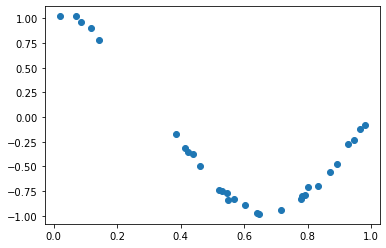

In [5]:
plt.scatter(X,y)


Degree 1 회귀 계수는 [-1.52] 입니다.
Degree 1 MSE 는 0.39 입니다.

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24] 입니다.
Degree 4 MSE 는 0.01 입니다.

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59875000e+03  5.21453600e+04 -4.14484410e+05
  1.80874277e+06 -3.38019792e+06 -6.02587636e+06  5.58415801e+07
 -1.69822710e+08  3.08623770e+08 -3.68960417e+08  2.93843277e+08
 -1.50694444e+08  4.51471219e+07 -6.01502853e+06] 입니다.
Degree 15 MSE 는 43057116.96 입니다.


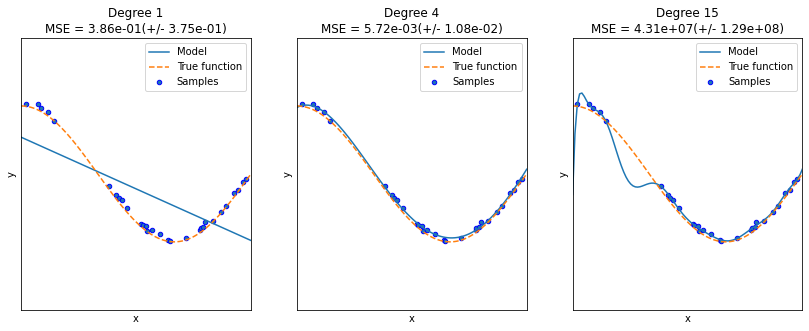

In [6]:
plt.figure(figsize = (14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## 편향-분산 트레이드 오프(Bias-Variance Trade off)
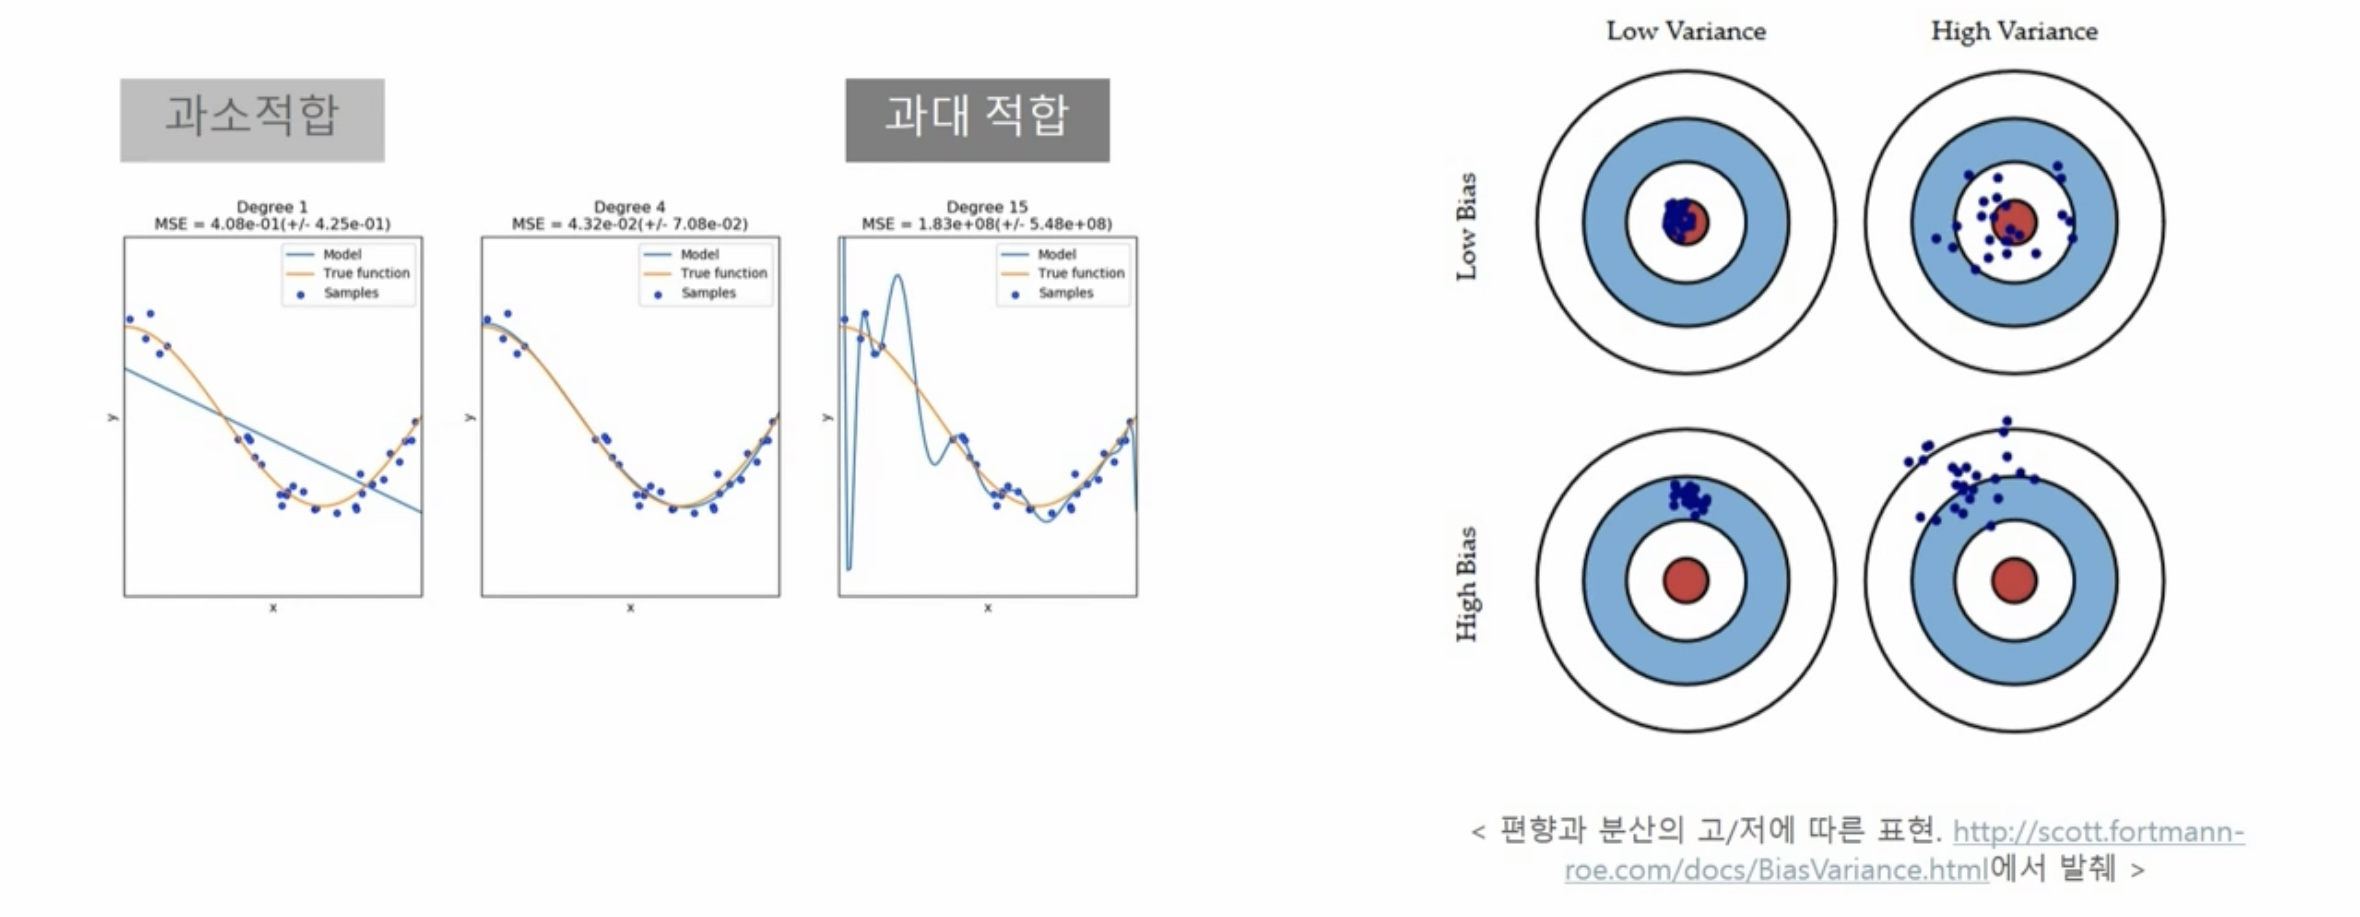

오버피팅과 언더피팅의 문제는 머신러닝에서 꼭 해결해야 하는 문제...
bias -> 방향성이라고 생각하면됨

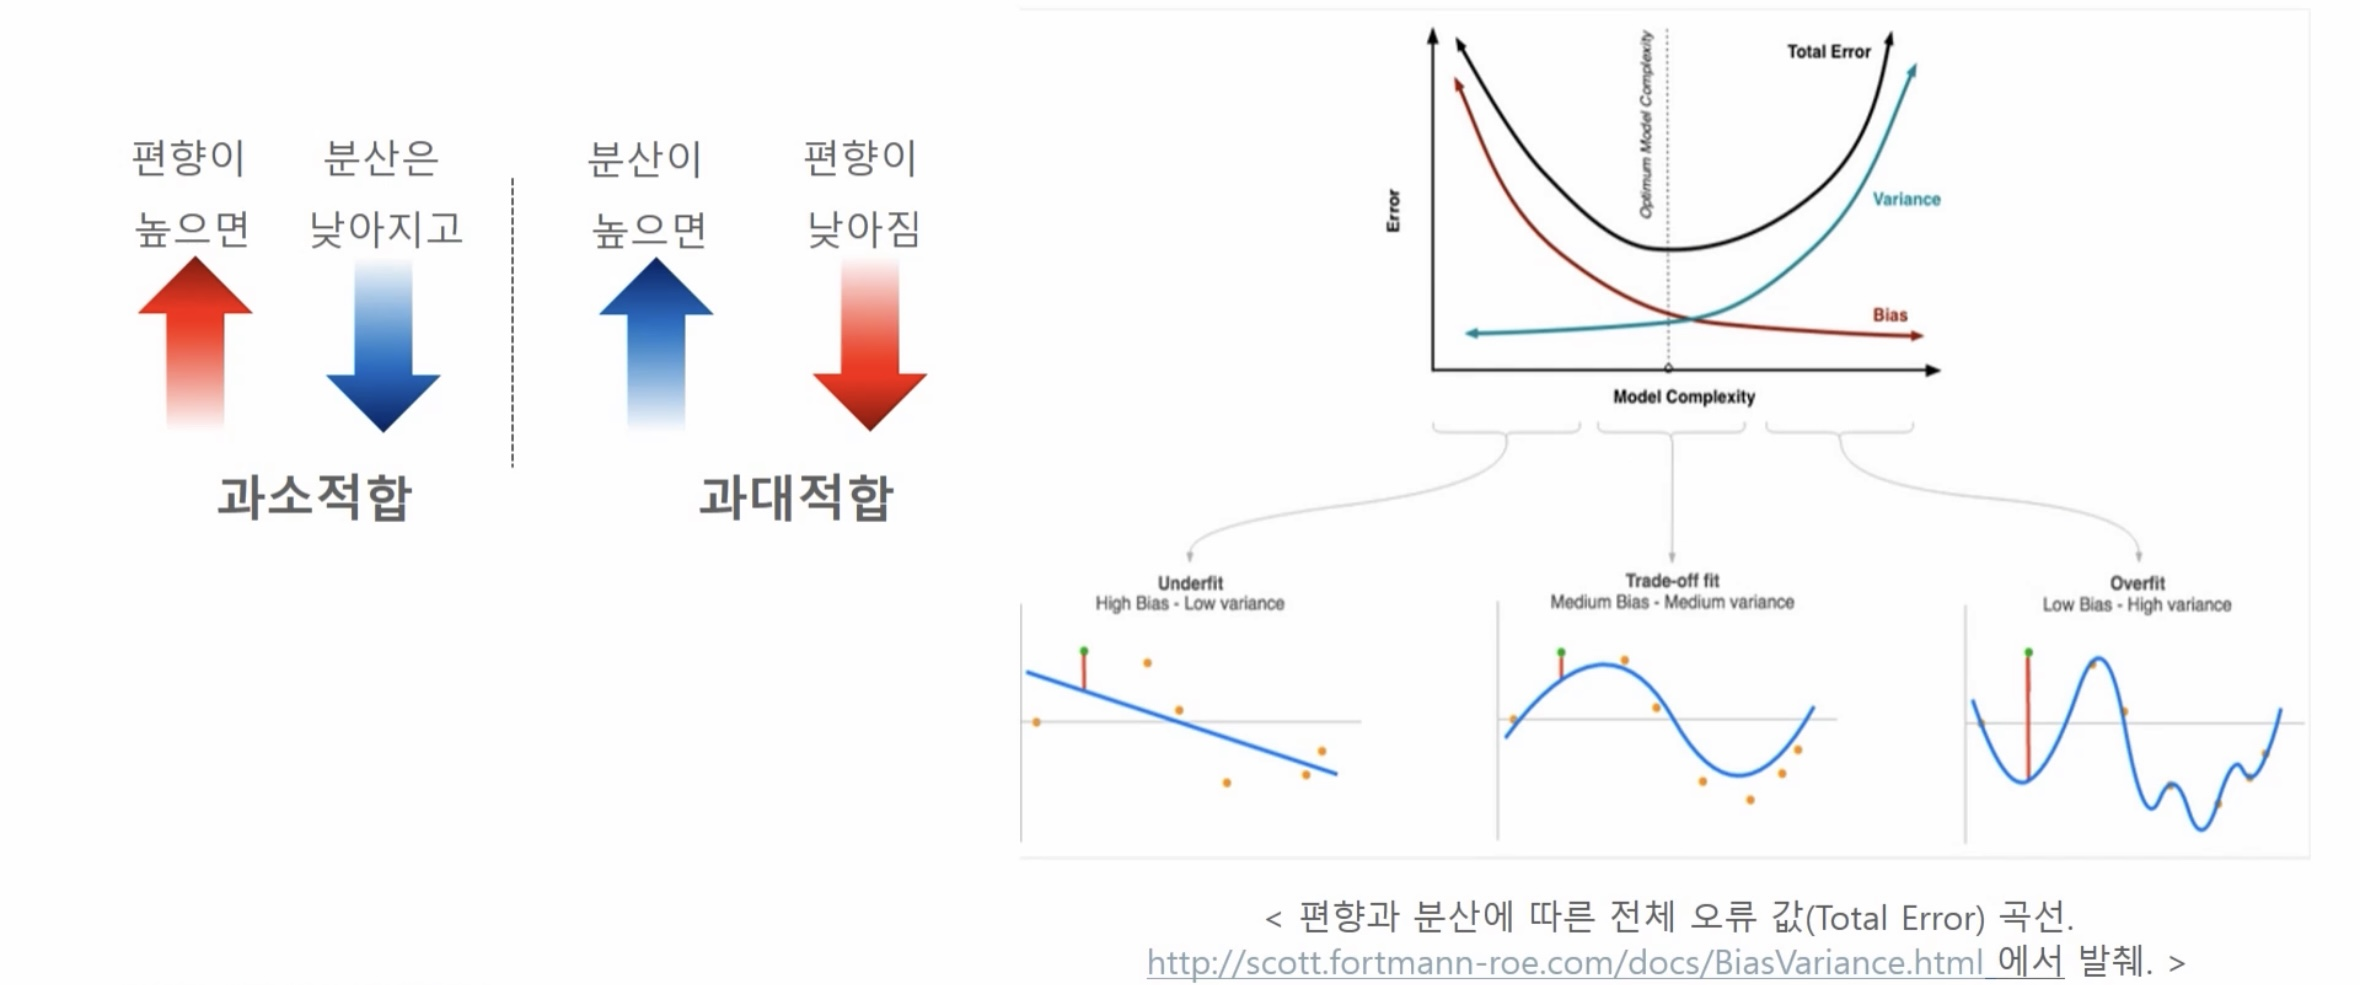